In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
%matplotlib inline

In [36]:
df = pd.read_csv("~\Desktop\Durban_Hotels.csv")

In [37]:
df

,hotel name,hotel description,hotel reviews,hotel_review_score
0,Endless Horizons Boutique Hotel,Endless Horizons Boutique Hotel features an in...,145 reviews,9.1
1,The Oyster Box,Overlooking the Umhlanga Lighthouse and Indian...,689 reviews,9.4
2,Ekhaya Boutique Hotel,Ideally located in the Westville district of D...,16 reviews,9.3
3,ONOMO Hotel Durban,Onomo Hotel Durban is located in walking dista...,"1,563 reviews",8.5
4,The Capital Pearls Hotel,"Set on Umhlanga's main beach, The Capital Pear...","2,054 reviews",8.9
5,Regal Inn Umhlanga Gateway,Regal Inn Umhlanga Gateway is set in the Umhla...,"2,047 reviews",8.0
6,aha Gateway Hotel Umhlanga,A rooftop pool is behind aha Gateway Hotel - U...,"1,686 reviews",8.4
7,Coastlands Umhlanga Hotel and Convention Centre,Just a 15-minute drive from King Shaka Interna...,"2,367 reviews",8.4
8,Holiday Inn Express Durban - Umhlanga,"Located in Umhlanga Ridge, Holiday Inn Express...","1,060 reviews",8.4
9,Coastlands Musgrave Hotel,"Located 1.4 mi from Greyville Racecourse, Coas...","1,437 reviews",8.0


In [38]:
df.shape

(10, 4)

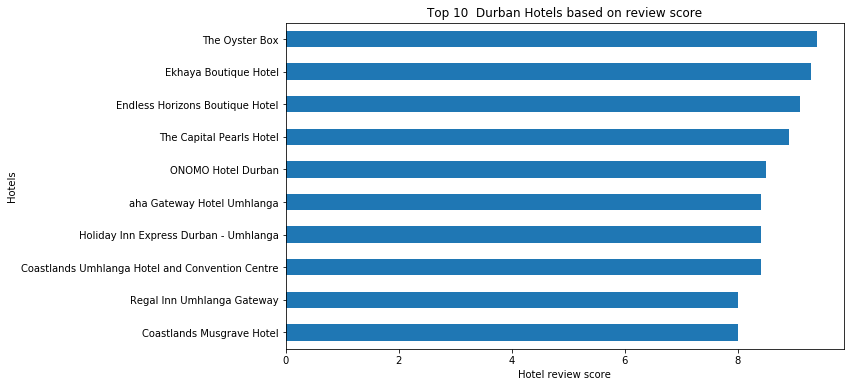

In [39]:
# plot for hotel names bases on hotel review score
Top_Hotel  = (df.groupby('hotel name')['hotel_review_score'].sum()/df.groupby('hotel name')['hotel_review_score'].count()).sort_values()
Top_Hotel.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Hotel review score') # add to x-label to the plot
plt.ylabel('Hotels') # add y-label to the plot
plt.title('Top 10  Durban Hotels based on review score') # add title to the plot
plt.show()

In [40]:
# finding similarity between the hotel description and customer reviews
from sklearn.feature_extraction.text import TfidfVectorizer
# define tfidf vectorizer object,to remove English words like 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
# constructing tfidf matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['hotel description'])
# shape of tfdidf_matrix
tfidf_matrix.shape

(10, 188)

In [41]:
# using linear_kernel package for calculating similarities between the hotels
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [42]:
# constructing a reverse map of indices and hotel names
df = df.reset_index()
titles = df['hotel name']
indices = pd.Series(df.index, index=df['hotel name'])

In [43]:
# function that takes a hotel name as input and output most similar hotels
def get_recommendations(title, cosine_sim=cosine_sim):
    # get the index of the hotel that matches the hotel name
    idx = indices[title]
    # get similarity scores of all hotels similar with that hotel
    sim_scores = list(enumerate(cosine_sim[idx]))
    # sort hotel based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # get the scores of the 5 most similar hotels
    sim_scores = sim_scores[1:6]
    hotel_indices = [i[0] for i in sim_scores]
    # return the top 5 most similar hotels
    return titles.iloc[hotel_indices]

In [44]:
get_recommendations('The Oyster Box')

9                          Coastlands Musgrave Hotel
5                         Regal Inn Umhlanga Gateway
8              Holiday Inn Express Durban - Umhlanga
7    Coastlands Umhlanga Hotel and Convention Centre
6                         aha Gateway Hotel Umhlanga
Name: hotel name, dtype: object

In [45]:
get_recommendations('Ekhaya Boutique Hotel')

3                       ONOMO Hotel Durban
8    Holiday Inn Express Durban - Umhlanga
5               Regal Inn Umhlanga Gateway
9                Coastlands Musgrave Hotel
0          Endless Horizons Boutique Hotel
Name: hotel name, dtype: object

In [46]:
get_recommendations('Endless Horizons Boutique Hotel')

9    Coastlands Musgrave Hotel
2        Ekhaya Boutique Hotel
1               The Oyster Box
4     The Capital Pearls Hotel
3           ONOMO Hotel Durban
Name: hotel name, dtype: object